<a href="https://colab.research.google.com/github/PhinyadaPhen/DWDM21/blob/main/Chapter_8_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## K-Means

### Generate Data

In [1]:
from sklearn.datasets import make_blobs

In [2]:
X, y = make_blobs(n_samples=500, centers=3, n_features=2, random_state=6)

### Explore data

In [3]:
X.shape

(500, 2)

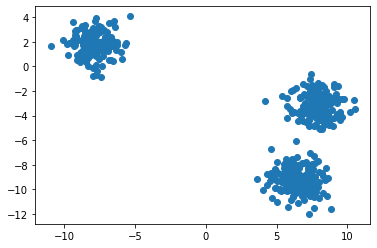

In [4]:
from matplotlib import pyplot as plt
plt.scatter(X[:,0],X[:,1])

### Clustering

####Import

In [5]:
from sklearn.cluster import KMeans

#### Define

In [6]:
kmeans = KMeans(n_clusters=2, random_state=6)

#### Fit-Predict

In [7]:
y_clust = kmeans.fit_predict(X)

In [8]:
y_clust

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,

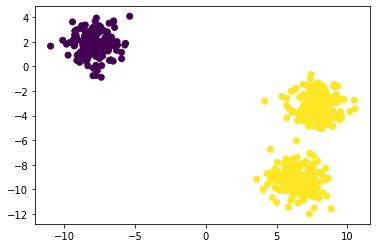

In [9]:
plt.scatter(X[:,0],X[:,1],c=y_clust)

3 clusters

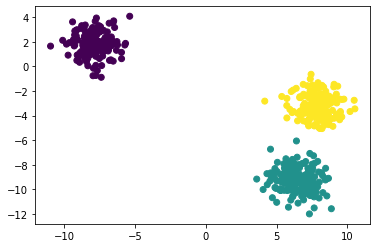

In [10]:
#define
kmeans = KMeans(n_clusters=3, random_state=6)
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

4 clusters

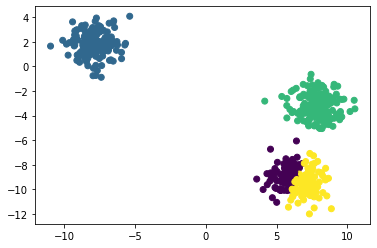

In [11]:
#define
kmeans = KMeans(n_clusters=4, random_state=6)
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

5 clusters

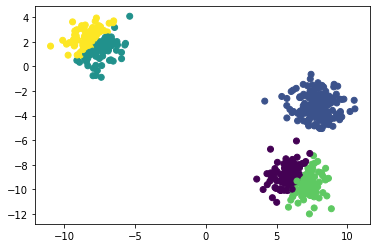

In [12]:
#define
kmeans = KMeans(n_clusters=5, random_state=14, init = 'random')
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

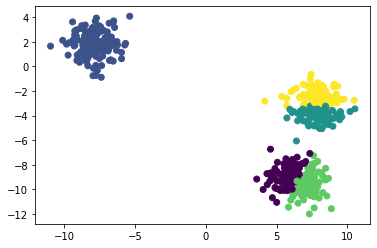

In [13]:
#define
kmeans = KMeans(n_clusters=5, random_state=6, init = 'random')
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

### Example Application (Color Quantization)

In [14]:
import cv2
import os

In [20]:
img = cv2.imread('/content/234702607_552612712845366_4029811567046734371_n.jpg')

In [21]:
img.shape

(2049, 1170, 3)

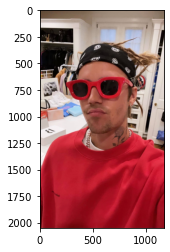

In [22]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

 ### **นับจำนวนสี**

In [23]:
import numpy as np

In [24]:
np.unique(np.reshape(RGB_img,(RGB_img.shape[0]*RGB_img.shape[1],3)),axis=0).shape

(159968, 3)

### **จัดกลุ่มสีให้เหลือ 16 สี**

In [25]:
myquantize = KMeans(n_clusters=16,random_state=6)

แปลงข้อมูลให้อยู่ในรูป row-column

In [26]:
img_row = np.reshape(RGB_img,(RGB_img.shape[0]*RGB_img.shape[1],3))
img_row.shape

(2397330, 3)

In [27]:
final_color = myquantize.fit_predict(img_row)

### **ใช้ centroid เป็นตัวแทนของสี**

In [28]:
centroid = myquantize.cluster_centers_

In [29]:
centroid

array([[ 15.14039284,   9.48757875,   7.69212082],
       [193.19134225, 172.3622866 , 161.71327241],
       [167.2584516 ,  17.64888241,  35.20531524],
       [126.12241892, 107.74940411,  96.50769972],
       [214.34574083, 200.83920615, 193.8772104 ],
       [193.80787684, 120.07132478, 101.47259692],
       [164.29697423, 145.07626025, 132.7749153 ],
       [141.97710882,   9.26489182,  22.92387618],
       [216.46767019,  45.17123615,  63.77538763],
       [164.65678988,  94.72170383,  77.29404446],
       [ 42.73406619,  29.72141685,  26.77157907],
       [ 88.34519982,  56.10604412,  45.94150015],
       [189.72059253,  28.55510228,  46.44081482],
       [234.98602748, 227.08126171, 224.60151156],
       [175.12396086, 191.5016763 , 224.06221135],
       [130.24378483,  73.914479  ,  59.11378811]])

แทนสีคืนลงไป

In [30]:
new_img = np.zeros(RGB_img.shape)
for i in range(RGB_img.shape[0]):
    for j in range(RGB_img.shape[1]):
        new_img[i,j,:] = centroid[myquantize.predict([RGB_img[i,j,:]]),:]

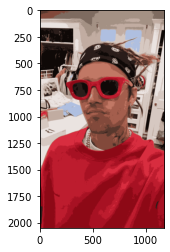

In [31]:
plt.imshow(new_img/255)

In [32]:
plt.imsave('img.jpg',new_img/255)

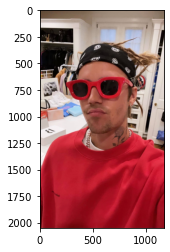

In [33]:
plt.imshow(RGB_img)

## Hierachical Clustering

https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

### Clustering Evaluation

https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation